# Table of Content (Code Part 6 of 6)

1. [Libraries](#libraries)
2. [Model Evaluation](#model-evaluation)
3. [Random Forest Exploration](#random-forest-exploration)
4. [Cost of Construction](#cost-of-construction)
5. [RF Classifier Final Tuning](#rf-classifier-final-tuning)
6. [Conclusion](#conclusion)
7. [Recommendation](#recommendation)

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [17]:
# Read allposts csv file
allposts = pd.read_csv('../Data/allposts.csv')

# Model Evaluation

In previous sections, we have optimized Random Forest Classifier and Support Vector Classifier. The best hyperparamters of each model are as below.

In [18]:
# This is the RF model with the best parameters
cvec_best = CountVectorizer(max_df=0.9, stop_words='english')
rf_best = RandomForestClassifier(ccp_alpha=0.0006, max_depth=15, random_state=12)

In [19]:
# This is the SVC model with the best parameters
tvec_best = TfidfVectorizer(max_df=0.9, stop_words='english')
svc_best = SVC(C=0.9, random_state=12)

In [20]:
# Initialize X and y with Original Combined Text
Xori = allposts['combinedtext']
y = allposts['subreddit']

# Perform train-test-split
Xori_train, Xori_test, y_train, y_test = train_test_split(Xori, y, test_size=.2, random_state=12)

In [21]:
# Initialize X and y with Stemmatized Tokenized Text
Xstem = allposts['stemmatized_tokenized_combinedtext']
y = allposts['subreddit']

# Perform train-test-split
Xstem_train, Xstem_test, y_train, y_test = train_test_split(Xstem, y, test_size=.2, random_state=12)

In [22]:
# Instantiate pipeline of Random Forest Classifier with Countvectorizer transformer
pipe_rf = Pipeline([
    ('cvec', cvec_best),
    ('rf', rf_best)
])

# Instantiate pipeline of Support Vector Classifier with TFIDFvectorizer transformer
pipe_svc = Pipeline([
    ('tvec', tvec_best),
    ('svc', svc_best)
])

In [23]:
# Train both models
pipe_rf.fit(Xori_train, y_train)

pipe_svc.fit(Xstem_train, y_train)

Pipeline(steps=[('tvec', TfidfVectorizer(max_df=0.9, stop_words='english')),
                ('svc', SVC(C=0.9, random_state=12))])

In [24]:
# RF Train score
print (f'RF train score: {pipe_rf.score(Xori_train, y_train)}')
# RF Test Score
print (f'RF test score: {pipe_rf.score(Xori_test, y_test)}')

# SVC Train score
print (f'SVC train score: {pipe_svc.score(Xstem_train, y_train)}')
# SVC Test Score
print (f'SVC test score: {pipe_svc.score(Xstem_test, y_test)}')

RF train score: 0.81625
RF test score: 0.796
SVC train score: 0.970125
SVC test score: 0.864


From both optimized models, we can see that SVC is still overfitting while Random Forest works much better where the train and test score are quite close to each other. Although testing score of SVC is higher, we will use RF to continue for futher investigation due to interpretability.

# Random Forest Exploration

In [104]:
# Fit and transform the train and test data
X_train_c = cvec_best.fit_transform(Xori_train)
X_test_c = cvec_best.transform(Xori_test)

In [27]:
# Create dataframe with all corpus words and text frequency inverse document frequency score
X_train_df = pd.DataFrame(data=X_train_c.toarray(),
                          columns=cvec_best.get_feature_names())

C:\Users\Zeonice\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
X_train_df.head()

,00,000,0004,000ft,00297,003,006u4w7rmei11,00h,01,0120934f1b69b4237e6f3c260b360c3c2e57c4b8,0192618911,01min,02,025,03,032,04,041te1y7ddd61,05,06,066421qutd871,06b6c49dc26ae621792dfb8022b3d709ab384583,07,08,08140,08bec1385a14447b062e63ce775226019aff35a6,09,0989515613,0990873854,0a1e34e32824e1eadcd07284db0f50eda1c823d8,0a6xiod0xpqljm,0ahukewik7,0ape,0e0eced346f12d7976cf7a28e74f309c44e227ad,0i2d93zcn9g51,0kelrkd9fyw,0kg,0lb,0m15s,0pb5khdovsfw38a2s2sapb,0potnvpwr5r61,0s,0sec,0w041mbk06p31,0x26fb5c80a28115d6,0x703893efa1d4dffc,0yp1mde6xv0,10,100,1000,...,аnd,аnother,аnоther,аnоthеr,аre,аrе,аwаy,еnоugh,еven,еveryweek,еveryweеk,еvеryone,еvеryweek,еvеrywеek,еxpеriеnce,ехperiencе,ехperienсe,ехperiеncе,нe,нis,оf,оne,оnly,оnе,оr,оwn,рassed,рassеd,рick,рiсk,раssеd,сalled,сouple,сouplе,саlled,соol,соuplе,сооl,тhеre,тhеrе,はな,中村,咲希,小池,生萌,真緒,菊地,菜月,谷井,野中
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# Explore top 10 words that appear most often,
X_train_df.sum().sort_values(ascending=False).head(10)

climbing      8450
just          3722
training      3577
bouldering    3385
ve            3370
like          3169
climb         2744
time          2376
gym           2252
strength      2153
dtype: int64

In [54]:
# Create DataFrame of all tokens with their respective importance
allfeatures = pd.DataFrame({'Variable':X_train_df.columns,
              'Importance':rf_best.feature_importances_}).sort_values('Importance', ascending=False)


In [105]:
# Display the top 20 tokens with high importance
topfeatures = allfeatures[0:20]
topfeatures

,Variable,Importance
19455,training,0.042373
8006,feel,0.031925
4877,climbing,0.024384
8123,finger,0.021086
20723,weight,0.019943
19445,train,0.017829
12164,max,0.017036
18222,strength,0.016143
6765,doing,0.015925
16086,rest,0.015059


Text(0, 0.5, 'Feature Importance')

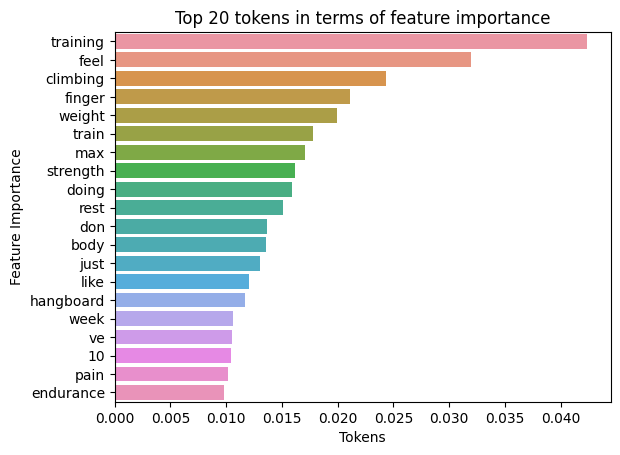

In [65]:
# Plot the top 20 tokens with high importance
sns.barplot(data=topfeatures, x = 'Importance', y='Variable')
plt.title('Top 20 tokens in terms of feature importance')
plt.xlabel('Tokens')
plt.ylabel('Feature Importance')

In [74]:
# Generate predictions
preds = pipe_rf.predict(Xori_test)

In [78]:
# Confusion matrix
cm = confusion_matrix(y_test, # True values.
                 preds)  # Predicted values.

C:\Users\Zeonice\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


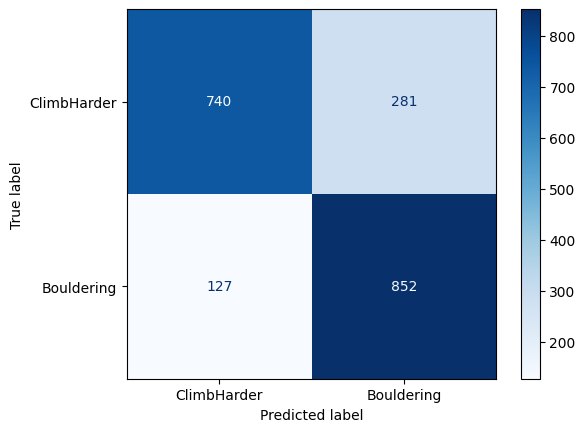

In [77]:
# Plot the confusion matrix
plot_confusion_matrix(pipe_rf, Xori_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['ClimbHarder', 'Bouldering']);

In [79]:
# Get True Negative, False Positive, False Negative and True Positive
tn, fp, fn, tp = cm.ravel()

In [82]:
# Accuracy of the model
accuracy_score(y_test, preds)

0.796

In [83]:
# Specificity of the model
spec = tn / (tn + fp)
spec

0.7247796278158668

In [85]:
# Sensitivity of the model
recall = recall_score(y_test, preds)
recall

0.8702757916241062

In [86]:
# Precision of the model
precision = precision_score(y_test, preds)
precision

0.7519858781994704

In [87]:
# F1 Score
f1_score(y_test, preds)

0.8068181818181818

C:\Users\Zeonice\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


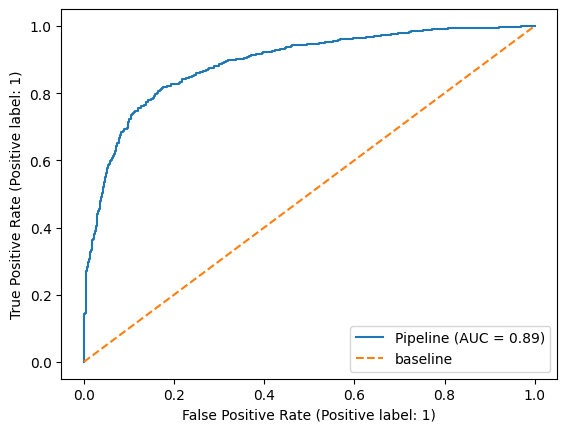

In [88]:
# Plot the ROC curve
plot_roc_curve(pipe_rf, Xori_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [102]:
# AUC score
roc_auc_score(y_test, pipe_rf.predict_proba(Xori_test)[:,1])

0.8893922219698889

AUC score is not too bad, but still has room for improvement.

# Cost of Construction

When it comes to building a sport climbing gym vs a bouldering gym, a question we should ask is the cost of construction. The height of bouldering wall is around 6.1m while sport climbing wall is 15m height. It costs a lot more when building sports climbing wall because of stronger foundation and structure integrity are required. Besides that, more equipments are required for sport climbing such as carabiners, harness, ropes and more. By taking all these into consideration, we will prefer to tune our model to favor bouldering by reducing the False Negative which are predicted ClimbHarder but actually from Bouldering. By doing this, we can make sure there is truly significant amount of interest in ClimbHarder which is sport climbing before we advise the sports hall owner to spend more capital in building a sport climbing gym.

# RF Classifier Final Tuning

In this section, we will tune the model to reduce Type II error.

In [93]:
# Set class weight in favoring Bouldering
cvec_reducefn = CountVectorizer(max_df=0.9, stop_words='english')
rf_reducefn = RandomForestClassifier(ccp_alpha=0.0006, max_depth=15, class_weight={0:1,1:1.5},random_state=12)

In [94]:
# Set pipeline with new parameters
pipe_reducefn = Pipeline([
    ('cvec', cvec_reducefn),
    ('rf', rf_reducefn)
])

In [95]:
# Train new model
pipe_reducefn.fit(Xori_test, y_test)

Pipeline(steps=[('cvec', CountVectorizer(max_df=0.9, stop_words='english')),
                ('rf',
                 RandomForestClassifier(ccp_alpha=0.0006,
                                        class_weight={0: 1, 1: 1.5},
                                        max_depth=15, random_state=12))])

C:\Users\Zeonice\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


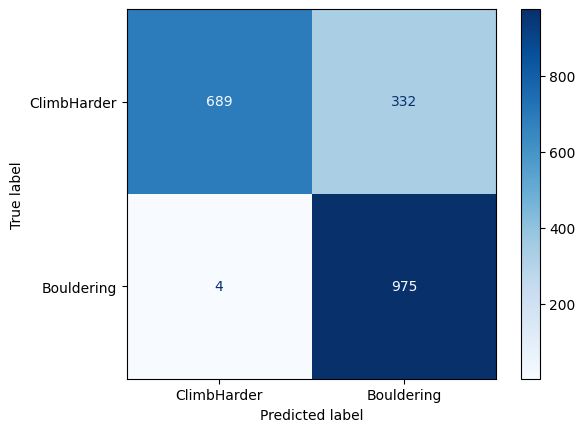

In [96]:
# Plot the confusion matrix after tuning
plot_confusion_matrix(pipe_reducefn, Xori_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['ClimbHarder', 'Bouldering']);

There is much lower FN in our model and more prediction on Bouldering after tuning the class weight. In this case, we can be very sure it is only advisable to spend more money to build a sport climbing gym when the classifer predicted ClimbHarder posts is higher than Bouldering.

C:\Users\Zeonice\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


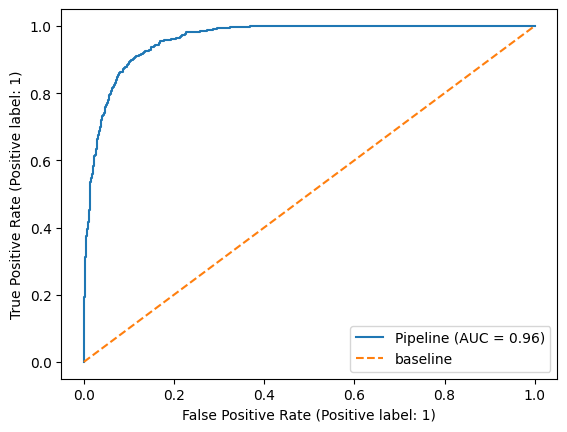

In [98]:
# Plot the ROC curve again after tuning
plot_roc_curve(pipe_reducefn, Xori_test, y_test);
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [99]:
# Generate predictions with new tuned model
preds1 = pipe_reducefn.predict(Xori_test)

In [100]:
# F1 Score after tuning
f1_score(y_test, preds1)

0.8530183727034121

In [101]:
# New AUC score after tuning
roc_auc_score(y_test, pipe_reducefn.predict_proba(Xori_test)[:,1])

0.9615260329805443

AUC score is now much closer to 1.

# Conclusion

5000 posts with word count from title or body not less than 20 were collected from ClimbHarder and Bouldering subreddits. Differeny classifer models were used initially in determining which two models can provide better performance and we selected the two models for further optimization. The two models selected were Random Forest Classifier and Support Vector Classifier. After further optimization, we found that Random Forest Classifier is able to provide better result which is not overfitting. 

The performance of Random Forest Classifier has been analyzed with various metrics. In order to set the budget wisely, we have tuned the parameters of the Random Forest Classifier to favor Bouldering which requires less capital in constructin a bouldering gym.

Our client can now implement the final model in their forum to classify the posts whether they are more interest in sport climbing or bouldering.

# Recommendation

It takes very long time to run through each model and each parameter, but all models can be further optimized and fine tune if time permits. Due to time constraint, only a few parameters were used in optimization and fine tuning. Besides that, local culture may cause some difference in between the English used by Reddit community and local Singlish. This could be a challenge for our model as it was trained with different sentence structure and phrase used.